* In this example, we try to suppress the dispersion of a FODO cell by varing the angle of quadrupole

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
from elegantIO import elegantLatticeFile
from elegantIO import elegant_findtwiss

* Redefine the basic FODO cell

In [2]:
fodo_lattice=elegantLatticeFile()
fodo_lattice.addElement('bend', 'CSBEND', l=2.0, angle=0.1)
fodo_lattice.addElement('qfh', 'kquad', l=0.5, k1=0.5)
fodo_lattice.addElement('qdh', 'kquad', l=0.5, k1=-0.5)
fodo_lattice.addElement('df', 'edrift', l=0.2)

fodo_lattice.appendToBeamline('oo', 'df', 'bend','df')
fodo_lattice.appendToBeamline('fodo', 'qfh', 'oo','qdh','qdh','oo','qfh')
fodo_lattice.setUseLine()
fodo_lattice.useline

'FODO'

In [20]:
twiss_list_FODO, twiss_parameter_FODO=elegant_findtwiss(fodo_lattice,matched=1)
twiss_parameter_FODO['nux']

0.2796611151632824

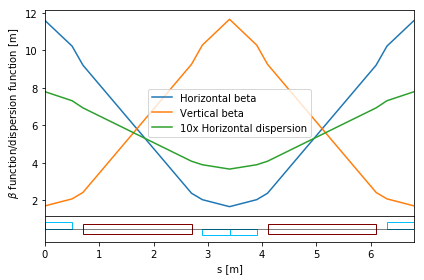

In [4]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
fodo_lattice.plotBeamline(ax2)

ax1.plot(twiss_list_FODO[0], twiss_list_FODO[1], label='Horizontal beta')
ax1.plot(twiss_list_FODO[0], twiss_list_FODO[6], label='Vertical beta')
ax1.plot(twiss_list_FODO[0], twiss_list_FODO[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [5]:
end_twiss=twiss_list_FODO[[1,2,4,5,6,7,9,10],-1]
end_twiss

array([ 1.16026688e+01, -2.77555756e-16,  7.79957237e-01,  3.33066907e-16,
        1.70293221e+00, -3.33066907e-16,  0.00000000e+00,  0.00000000e+00])

In [33]:
fodo_copies=10
lines=[]
dispersion_suppress=elegantLatticeFile()
for i in range(fodo_copies):
    line_name=dispersion_suppress.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
dispersion_suppress.appendToBeamline('total_line', *lines)

angle=fodo_lattice.getElementProperties('bend','angle')

for i in range(fodo_copies-8, fodo_copies):
    dispersion_suppress.modifyElement('bend_{}'.format(i+1), angle=angle/2.0)
dispersion_suppress.setUseLine('total_line')
twiss_list_ds1, twiss_parameter_ds1=elegant_findtwiss(dispersion_suppress, matched=0, initial_optics=end_twiss)

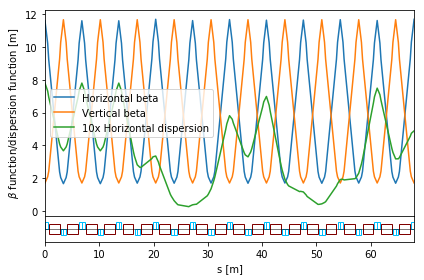

In [34]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress.plotBeamline(ax2)

ax1.plot(twiss_list_ds1[0], twiss_list_ds1[1], label='Horizontal beta')
ax1.plot(twiss_list_ds1[0], twiss_list_ds1[6], label='Vertical beta')
ax1.plot(twiss_list_ds1[0], twiss_list_ds1[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

The first angle should have potion of 0.421837932002


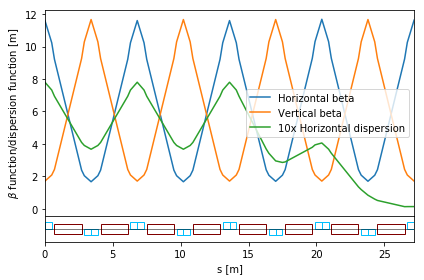

In [8]:
fodo_copies=4
angle=fodo_lattice.getElementProperties('bend','angle')
phi=twiss_list_FODO[[3],-1]
param=1.0/2.0/(1-np.cos(phi))[0]
angle1=angle*param
angle2=angle-angle1
print("The first angle should have potion of {}".format(param))

lines=[]
dispersion_suppress2=elegantLatticeFile()
for i in range(fodo_copies):
    line_name=dispersion_suppress2.loadALine(fodo_lattice, 'fodo', suffix='_{}'.format(i+1))
    lines.append(line_name)
dispersion_suppress2.appendToBeamline('total_line', *lines)



i=fodo_copies-1
dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=angle1)
i=fodo_copies-2
dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=angle2)
dispersion_suppress2.setUseLine('total_line')

twiss_list_ds2, twiss_parameter_ds2=elegant_findtwiss(dispersion_suppress2, matched=0, initial_optics=end_twiss)
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress2.plotBeamline(ax2)

ax1.plot(twiss_list_ds2[0], twiss_list_ds2[1], label='Horizontal beta')
ax1.plot(twiss_list_ds2[0], twiss_list_ds2[6], label='Vertical beta')
ax1.plot(twiss_list_ds2[0], twiss_list_ds2[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [9]:
twiss_list_ds2[:, -1]

array([ 2.72000000e+01,  1.16312232e+01, -1.90546006e-03,  6.99018722e+00,
        1.31052822e-02, -1.38030326e-03,  1.70293221e+00,  1.55575552e-12,
        6.92256915e+00,  0.00000000e+00,  0.00000000e+00])

In [15]:
def dispersion_response(r1, r2):
    i=fodo_copies-1
    dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=r1*angle, increment=False)
    i=fodo_copies-2
    dispersion_suppress2.modifyElement('bend_{}'.format(i+1), angle=r2*angle, increment=False)
    dispersion_suppress2.setUseLine('total_line')
    twiss_list_ds2, twiss_parameter_ds2=elegant_findtwiss(dispersion_suppress2, matched=0, initial_optics=end_twiss)
    return twiss_list_ds2[[4,5],-1]

In [17]:
dparam=0.001
base=dispersion_response(param, 1-param)
delta_1=dispersion_response(param+dparam, 1-param)
delta_2=dispersion_response(param, (1-param)+dparam)

response=np.transpose(np.vstack([(delta_1-base)/dparam,(delta_2-base)/dparam]))
change=np.dot(np.linalg.inv(response),base*(-1.0))

new_result=dispersion_response(param+change[0], (1-param)+change[1])

twiss_list_ds2, twiss_parameter_ds2=elegant_findtwiss(dispersion_suppress2, matched=0, initial_optics=end_twiss)


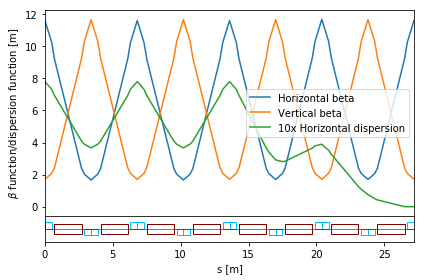

In [18]:
fig,(ax1,ax2)=plt.subplots(2,gridspec_kw = {'height_ratios':[8, 1]}, sharex=True)
dispersion_suppress2.plotBeamline(ax2)

ax1.plot(twiss_list_ds2[0], twiss_list_ds2[1], label='Horizontal beta')
ax1.plot(twiss_list_ds2[0], twiss_list_ds2[6], label='Vertical beta')
ax1.plot(twiss_list_ds2[0], twiss_list_ds2[4]*10, label='10x Horizontal dispersion')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function/dispersion function [m]')
fig.tight_layout()
ax1.legend(loc='best')
plt.subplots_adjust(hspace=0.0)

In [19]:
twiss_list_ds2[:, -1]

array([ 2.72000000e+01,  1.16292023e+01, -2.00381510e-03,  6.98964472e+00,
       -1.15205335e-05,  8.95843244e-07,  1.70293221e+00,  1.55575552e-12,
        6.92256915e+00,  0.00000000e+00,  0.00000000e+00])